In [1]:
import random
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial
import statistics

In [67]:

def rw2(n):# this gives samples from weibull(2,1)# put n=10000,the shape 2 and the scale 1
    x,y=0,0
    distance=[]
    for i in range(1,n+1):
            r=random.weibullvariate(alpha,beta) # step size r
            theta=2.*math.pi*random.random()
            x +=r*math.cos(theta)
            y +=r*math.sin(theta)
            distance.append(r)# save the distances r for the mcmc sampler
    return(np.array(distance))# depending what do you want to do, either save the pairs, or save the distances r  between points
    #return(x,y)
    
alpha=1 # scale
beta=2 #shape parameter
n=100
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data = rw2(n)# very important because you need the same data, if you put rw2(n) in there you change the data every time
#data    

In [68]:
# calculate the log likelihood of weibull(a,b)
import scipy.stats 
from scipy.stats import dweibull
def log_likelihood(x,a,b):
     return sum(dweibull.logpdf(x,scale=b,c=a))
def likelihood(x,a_scale,b_shape):
     return prod(dweibull.pdf(x,scale=a_scale,c=b_shape))    

Acceptance rate = 0.5043
0.998108330361


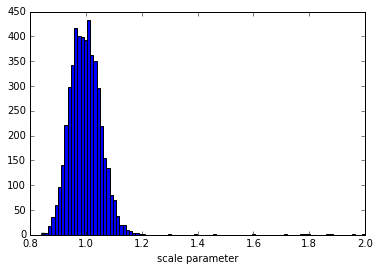

In [72]:
import scipy.stats as stats
from scipy.stats import invgamma
import numpy as np
from numpy import prod
# initial guess for theta(a and b) as array. Now the shape 2 is fixed, the prior is inverse gamma(1,2)
guess = 2
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = 0.1  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_lik = likelihood(data,old_theta,2)#calculate the first log likelihood
old_target=old_lik*invgamma.pdf(old_theta,1,scale=2)
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
    if new_theta<0: 
        continue
    new_lik = likelihood(data,new_theta,2)
    new_target=new_lik*invgamma.pdf(new_theta,1,scale=2)
    # Accept new candidate in Monte-Carlo fashing.
    if (new_target > old_target):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_lik=new_lik
        old_theta=new_theta
        old_target=new_target
    else:
        u = random.uniform(0.0,1.0)
        if (u < new_target/old_target):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_lik=new_lik
            old_theta=new_theta
            old_target=new_target 
print("Acceptance rate = "+str(accepted/10000.0))
print(statistics.mean(A))
plt.hist(A,bins=100)
plt.xlabel("scale parameter")
plt.show()

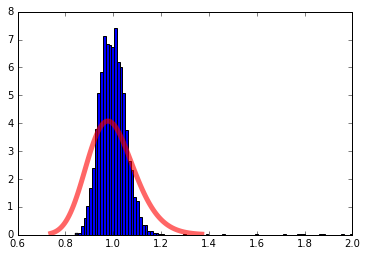

In [81]:
a = 1+n
b=2+sum(data**2)
x = np.linspace(invgamma.ppf(0.001, a,scale=b),                invgamma.ppf(0.999, a,scale=b), 100)
plt.plot(x, invgamma.pdf(x, a,scale=b),'r-', lw=5, alpha=0.6, label='invgamma pdf')
plt.hist(A,bins=100,normed=True)
plt.show()

In [79]:
len(data)


100

In [78]:
data

array([ 0.79478147,  0.75480851,  0.35753346,  0.68964622,  0.90514095,
        1.16614379,  1.38054595,  0.5972529 ,  0.44111623,  1.93738362,
        0.36238213,  0.30376037,  0.67902231,  0.82417976,  0.68746095,
        1.06555216,  0.64454373,  0.64132839,  1.06997643,  1.55169695,
        1.06166156,  0.99695764,  1.61357804,  0.65146302,  1.18428563,
        0.63926051,  0.80976281,  0.52109708,  0.19688058,  0.94650326,
        0.56886351,  1.02608232,  0.28389335,  1.38112342,  0.23319317,
        0.95468688,  0.27952308,  0.82889742,  0.90465811,  0.98737648,
        1.43967346,  1.56935741,  1.00926492,  0.21043992,  0.92648547,
        0.41353574,  0.35366572,  1.05121006,  0.85245981,  0.76173816,
        0.35149702,  0.44424677,  0.80189924,  1.41481877,  0.44019733,
        0.41389849,  1.5523617 ,  1.08888697,  0.71198323,  0.71524275,
        1.45229293,  0.71537292,  0.78156859,  1.33106008,  1.40523703,
        2.14640868,  1.12591548,  0.80905995,  1.21763579,  0.40

In [18]:
2+sum(data**2)

98.778379867391223